In [1]:
import numpy as np
from numpy.fft import fft, ifft, fft2, ifft2
import matplotlib.pyplot as plt
import scipy.linalg as linalg

# **Exercice 1. (Translation entière)**

### **Chargement de l'image et definissons a**

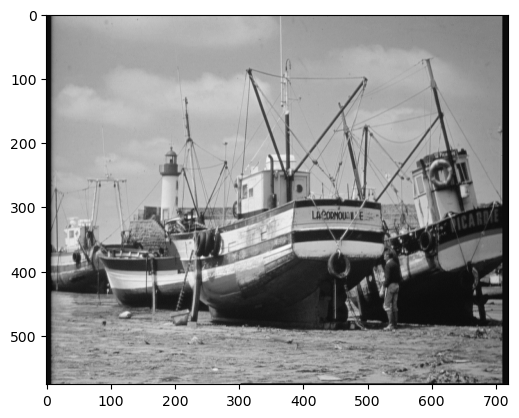

In [4]:
u = plt.imread('sujet_TP5\Boats.bmp')
plt.imshow(u, cmap ='gray');

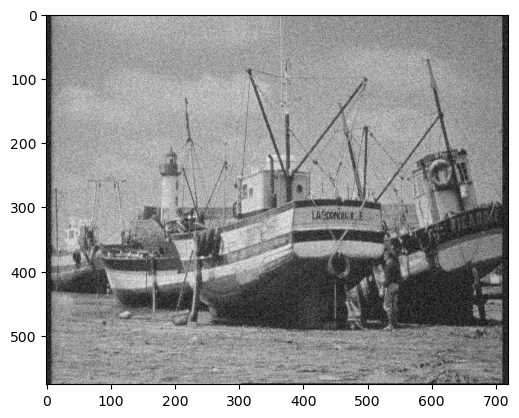

In [5]:
sigma = 70
e = np.random.rand(*u.shape)*sigma
plt.imshow(u + e, cmap = 'gray');

In [6]:
a = np.array([2,6])

### **Implémentons la translation de 𝑢 par 𝑎 dans le domaine de Fourier en effectuant un déphasage**

In [8]:
def translation(u, a):
    '''Translation entière 2d'''
    M, N = u.shape     # Taille de l'image
    x, y = np.arange(M), np.arange(N) # Creation de vecteur de taille (M,N)
    fact_translat = np.exp(-2j * np.pi * (a[0] * x[:, np.newaxis]/M + a[1] * y/N)) # facteur de translation en utilisant les deux vecteurs
    u_translat = np.real(ifft2(fft2(u) * fact_translat)) # u translaté
    return u_translat

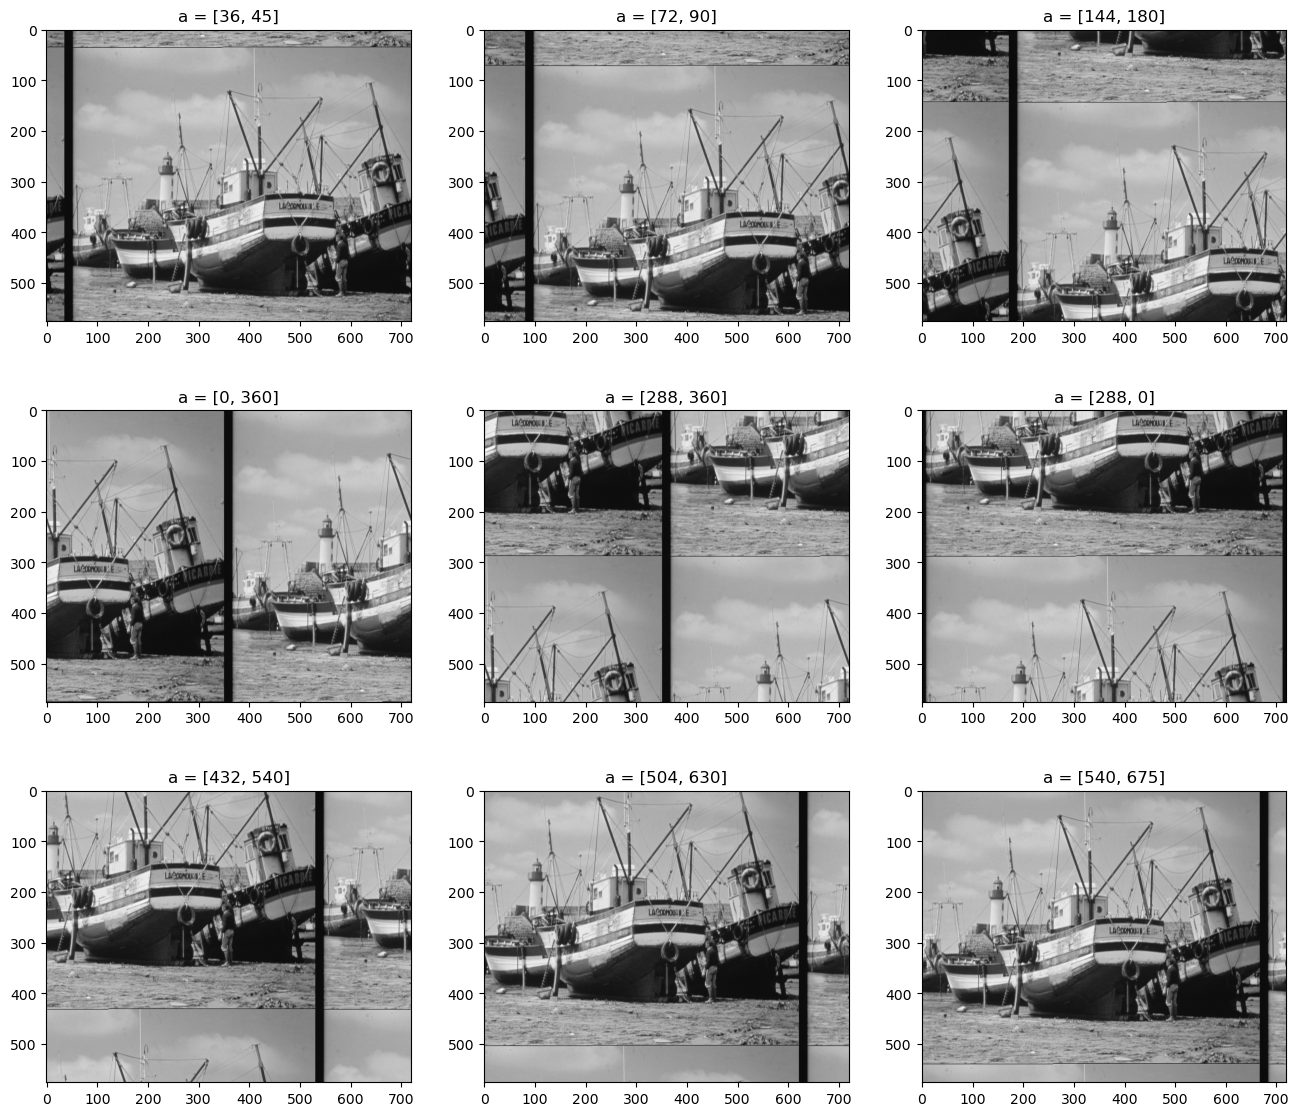

In [9]:
fig, ax = plt.subplots(3,3, figsize = (16, 14)) 

a_values = [[36, 45], [72, 90], [144,180],[0, 360], [288, 360], [288, 0], [432, 540], [504,630], [540, 675]]  

for i, a in enumerate(a_values[:3]):
    u_translated = translation(u, a)
    ax[0, i].imshow(u_translated, cmap='gray')
    ax[0, i].set_title(f'a = {a}')
    
for j, a in enumerate(a_values[3:6]):
    u_translated = translation(u, a)
    ax[1, j].imshow(u_translated, cmap='gray')
    ax[1, j].set_title(f'a = {a}')
    
for k, a in enumerate(a_values[6:]):
    u_translated = translation(u, a)
    ax[2, k].imshow(u_translated, cmap='gray')
    ax[2, k].set_title(f'a = {a}')

### **Définissons deux fenêtres w1 et w2**

In [11]:
def w1(u, r): 
    '''Fenêtre w1'''
    w1 = np.zeros_like(u)
    w1[r:-r, r:-r] = 1
    return w1

def w2(u, r):
    '''Fenêtre w2'''
    M, N = u.shape
    w2_rows = np.ones((M, N))
    w2_cols = np.ones((M, N))

    # Interpolation linéaire sur les lignes
    for i in range(r):
        w2_rows[i, :] = i/r
        w2_rows[-i-1, :] = i/r

    # Interpolation linéaire sur les colonnes
    for j in range(r):
        w2_cols[:, j] = j/r
        w2_cols[:, -j-1] = j/r

    # Produit des deux fenêtres
    w2 = w2_rows * w2_cols
    return w2

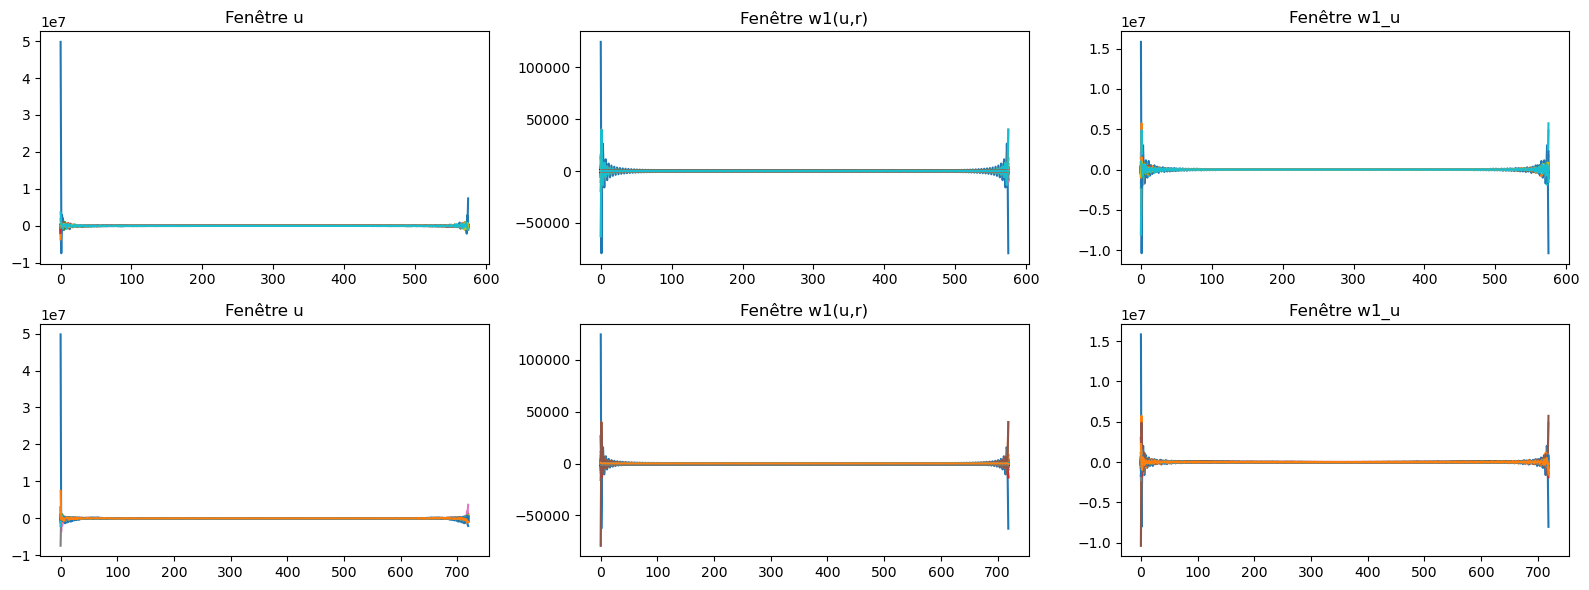

In [12]:
r = 144

fig, axes = plt.subplots(2, 3, figsize=(16,6))

w1_u = u * w1(u, r)

var_name = ["u", "w1(u,r)", "w1_u" ]

var_val = [u, w1(u,r), w1_u]

for i, (name, var) in enumerate (zip(var_name, var_val)):          
    axes[0, i].plot(fft2(var).real)
    axes[0, i].plot(fft2(var).imag)
    axes[0, i].set_title(f"Fenêtre {name}")
    
for j, (name, var) in enumerate (zip(var_name, var_val)):          
    axes[1, j].plot(fft2(var).T.real)
    axes[1, j].plot(fft2(var).T.imag)
    axes[1, j].set_title(f"Fenêtre {name}")
    
plt.tight_layout()

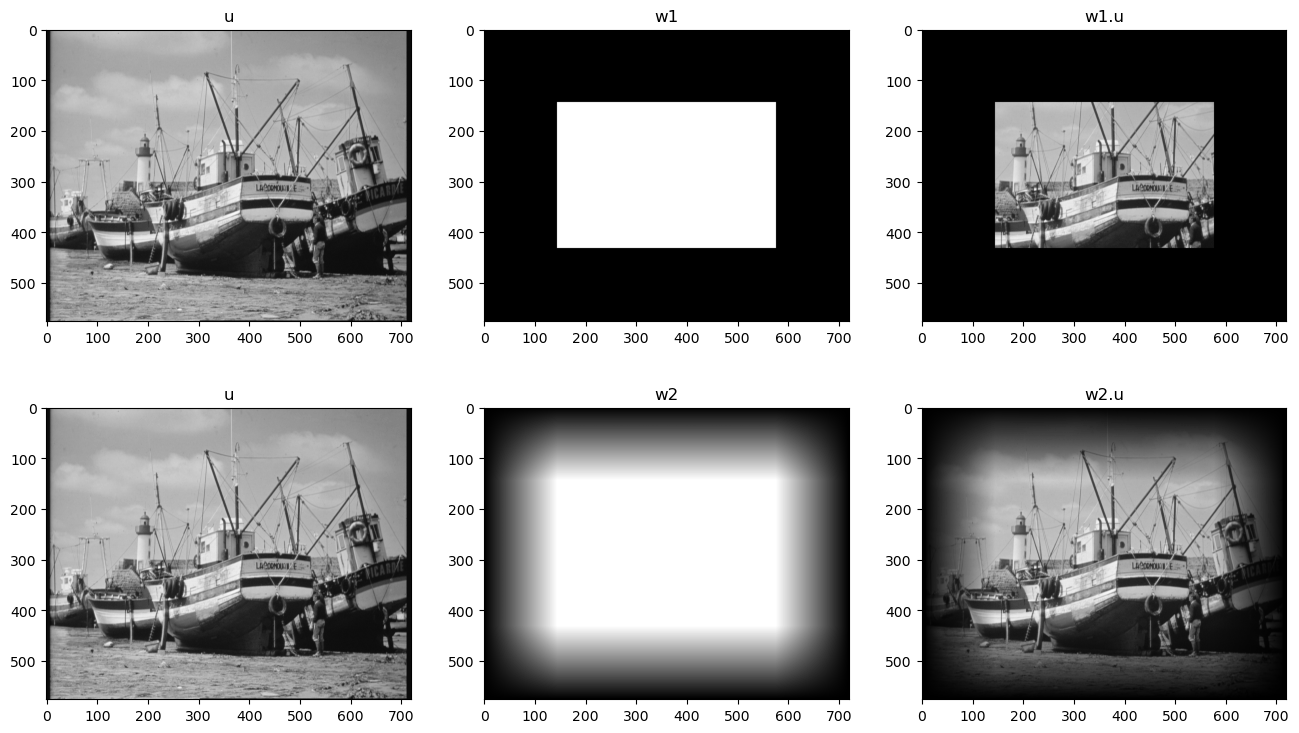

In [13]:
r = 144

fig, ax = plt.subplots(2, 3, figsize=(16, 9))

w1_u = u * w1(u, r)

w2_u = u * w2(u, r)

var_name, var_name2 = ["u", "w1", "w1.u"],  ["u", "w2", "w2.u"]

var_val, var_val2 = [u, w1(u,r), w1_u] , [u, w2(u,r), w2_u]

for i, (name, var) in enumerate (zip(var_name, var_val)):          
    ax[0, i].imshow(var, cmap = 'gray')
    ax[0, i].set_title(f"{name}")
    
for j, (name2, var2) in enumerate (zip(var_name2, var_val2)):          
    ax[1, j].imshow(var2, cmap = 'gray')
    ax[1, j].set_title(f"{name2}")

###  **Bonus**

In [15]:
def w3(u, r):
    '''Fenêtre w3'''
    M, N = u.shape
    w3_rows = np.zeros((M, N))
    w3_cols = np.zeros((M, N))

    # Interpolation linéaire sur les lignes
    for i in range(r):
        w3_rows[i, :] = i/r
        w3_rows[-i-1, :] = i/r

    # Interpolation linéaire sur les colonnes
    for j in range(r):
        w3_cols[:, j] = j/r
        w3_cols[:, -j-1] = j/r

    # Produit des deux fenêtres
    w3 = w3_rows * w3_cols
    return w3

def w4(u, r):
    '''Fenêtre w4'''
    M, N = u.shape
    w4_rows = np.zeros((M, N))
    w4_cols = np.zeros((M, N))
    w4_rows[r:-r, r:-r] = 1
    w4_cols[r:-r, r:-r] = 1

    # Interpolation linéaire sur les lignes
    for i in range(r):
        w4_rows[r+i, :] = i/r
        w4_rows[-r-i-1, :] = i/r

    # Interpolation linéaire sur les colonnes
    for j in range(r):
        w4_cols[:, r+j] = j/r
        w4_cols[:, -r-j-1] = j/r

    # Produit des deux fenêtres
    w4 = w4_rows * w4_cols
    return w4

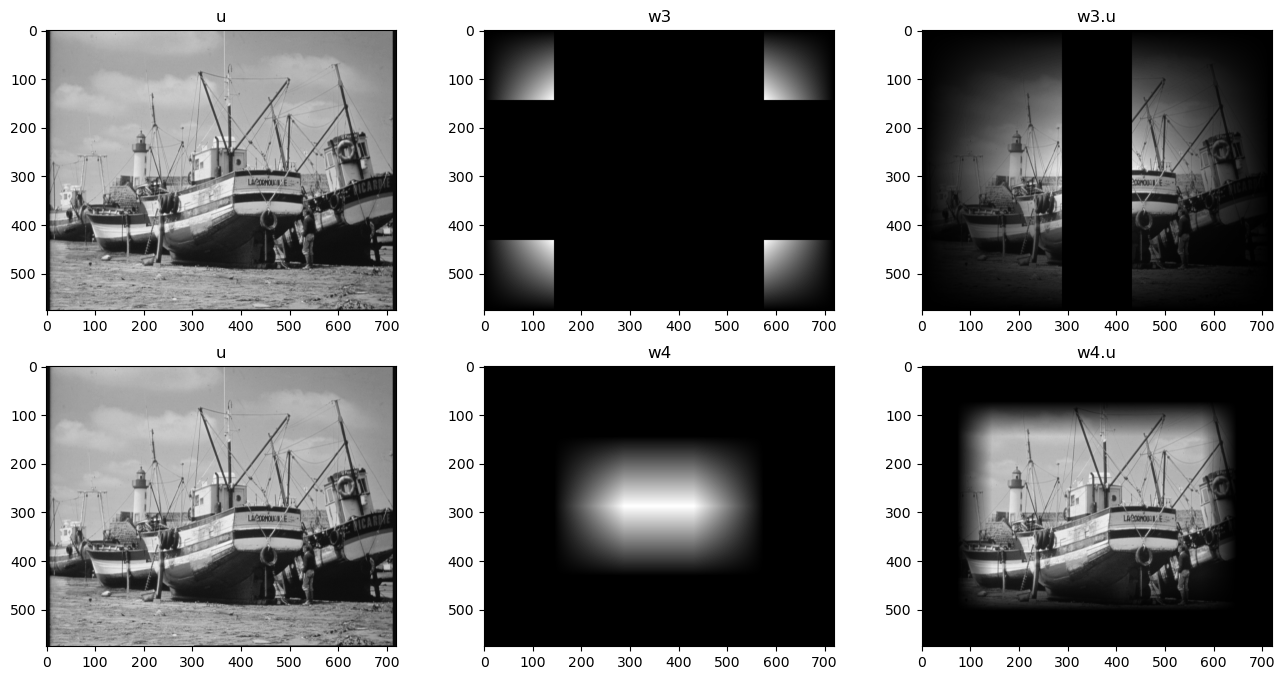

In [16]:
fig, ax = plt.subplots(2, 3, figsize=(16,8))

w3_u = u * w3(u, 288)

w4_u = u * w4(u, 72)

var_name3, var_name4 = ["u", "w3", "w3.u"],  ["u", "w4", "w4.u"]

var_val3, var_val4 = [u, w3(u,r), w3_u] , [u, w4(u,r), w4_u]

for i, (name3, val3) in enumerate (zip(var_name3, var_val3)):          
    ax[0, i].imshow(val3, cmap = 'gray')
    ax[0, i].set_title(f"{name3}")
    
for j, (name4, val4) in enumerate (zip(var_name4, var_val4)):          
    ax[1, j].imshow(val4, cmap = 'gray')
    ax[1, j].set_title(f"{name4}")

### **Translations de w1.u et w2.u**

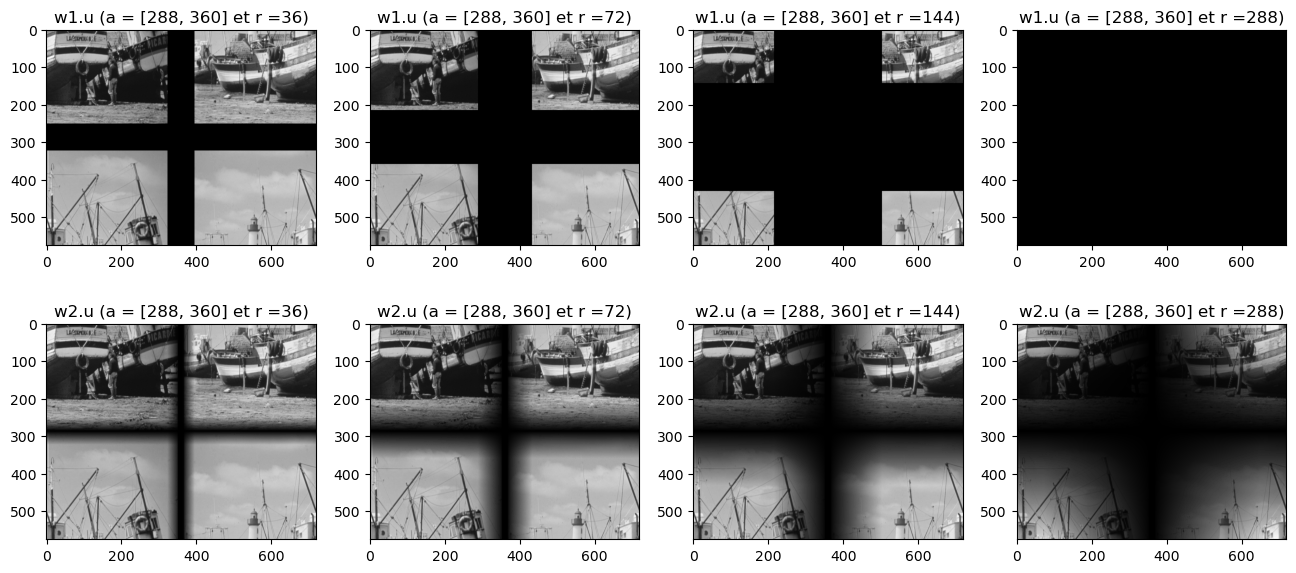

In [18]:
a = [288, 360]

r_values = [36, 72, 144, 288]

fig, axes = plt.subplots(2, 4, figsize = (16, 7))

for i, r in enumerate(r_values):
    w1_u = u * w1(u, r)
    t1 = translation(w1_u, a)
    axes[0, i].imshow(t1, cmap='gray')
    axes[0, i].set_title(f'w1.u (a = {a} et r ={r})')
    
for j, r in enumerate(r_values):
    w2_u = u * w2(u, r)
    t2 = translation(w2_u, a)
    axes[1, j].imshow(t2, cmap='gray')
    axes[1, j].set_title(f'w2.u (a = {a} et r ={r})')

### **Estimation de a en fonction de h**

In [20]:
# Calcul de la transformée de Fourier de v

a = np.array([288,360])

sigma = 1

e = np.random.rand(*u.shape)*sigma

Fu = fft2(u)

v = translation(u, a) + e

Fv = fft2(v)

Fh = Fv / Fu

Fe = fft2(e) 

D = np.real(ifft2(Fh-Fe/Fu))

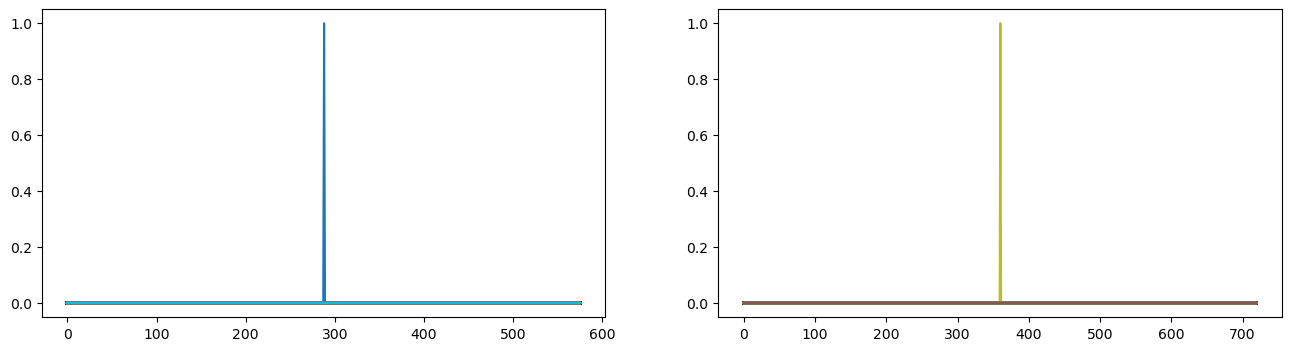

In [21]:
plt.figure(figsize =(16,4))
plt.subplot(121)
plt.plot(D)
plt.subplot(122)
plt.plot(D.T);

In [22]:
# Trouver les indices du maximum de D
max_index = np.unravel_index(np.argmax(D), D.shape)

print("Estimation de a:", max_index)

Estimation de a: (288, 360)


In [23]:
def a_estim(a, u, sigma): 
    '''estimation du vecteur 2d a de translation'''
    e = np.random.rand(*u.shape)*sigma
    Fu = fft2(u)
    v = translation(u, a) + e
    Fv = fft2(v)
    Fh = Fv / Fu   
    Fe = fft2(e) 
    D = np.real(ifft2(Fh-Fe/Fu))   
    a_estim = np.unravel_index(np.argmax(D), D.shape)    
    return a_estim

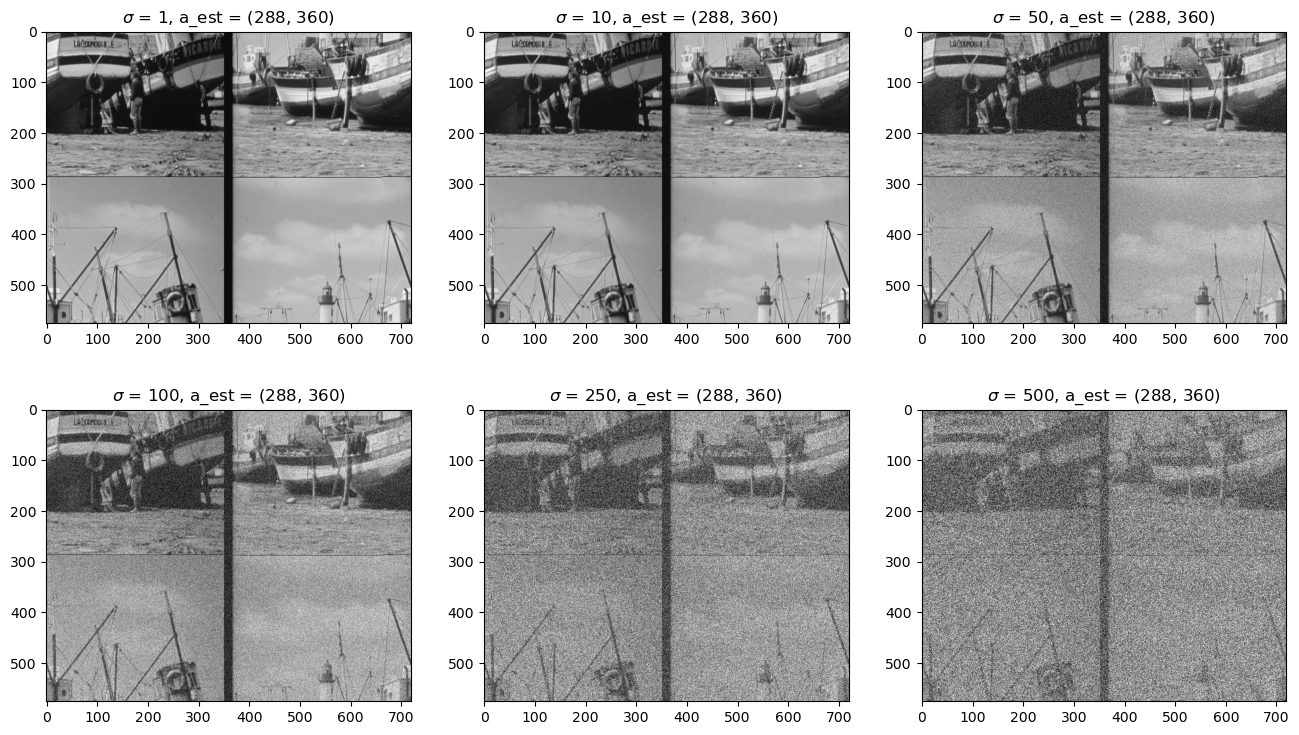

In [24]:
a = np.array([288, 360])

sigma_values = [1, 10, 50, 100, 250, 500]

fig, axes = plt.subplots(2, 3, figsize=(16, 9))

for i, sigma in enumerate (sigma_values[:3]):
    e = np.random.rand(*u.shape)*sigma
    v = translation(u, a) + e
    axes[0, i].imshow(v, cmap = 'gray')
    axes[0, i].set_title(f"$\sigma$ = {sigma}, a_est = {a_estim(a, u, sigma)}")
    
for j, sigma2 in enumerate (sigma_values[3:]):
    e = np.random.rand(*u.shape)*sigma2
    v = translation(u, a) + e
    axes[1, j].imshow(v, cmap = 'gray')
    axes[1, j].set_title(f"$\sigma$ = {sigma2}, a_est = {a_estim(a, u, sigma2)}")
    

# **Exercice 2. (Translation sous-pixelique)**

### **Translation avec des valeurs de a non entières**

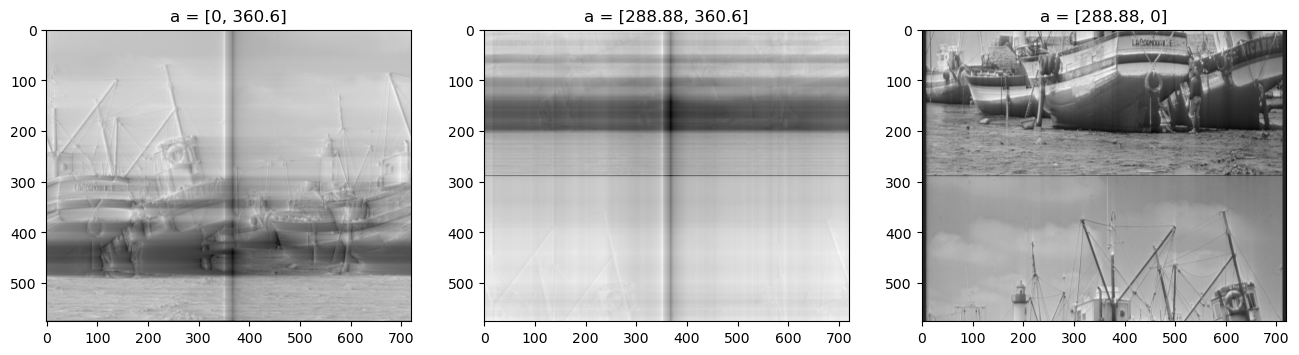

In [27]:
_ ,ax = plt.subplots(1, 3, figsize = (16, 4))

a_nent = [[0, 360.60], [288.88, 360.60], [288.88, 0]]

for i, a_n in enumerate(a_nent):
    ax[i].imshow(translation(u, a_n), cmap = 'gray')
    ax[i].set_title(f'a = {a_n}');

### **Implémentation du déphasage avec des matrices de fréquences symétrisées**

In [29]:
def translation2(u, a):
    '''Translation non entière 2d'''
    M, N = u.shape     # Taille de l'image
    
    # Création des matrices de fréquences symétrisées
    km = np.zeros(M)
    km[0:int(M/2)+1] = np.arange(0, int(M/2)+1)
    km[int(M/2)+1:M] = -np.flip(np.arange(1, int(M/2)))
    Km = np.outer(km, np.ones(N))
    
    kn = np.zeros(N)
    kn[0:int(N/2)+1] = np.arange(0, int(N/2)+1)
    kn[int(N/2)+1:N] = -np.flip(np.arange(1, int(N/2)))
    Kn = np.outer(np.ones(M), kn)
    
    # Déphasage correspondant à la translation a dans le domaine de Fourier
    fact_translat = np.exp(-2j * np.pi * (Km * a[0] + Kn * a[1]))
    
    u_translat = np.real(ifft2(fft2(u) * fact_translat))
    
    return u_translat

### **Application de la méthode de translation non entière**

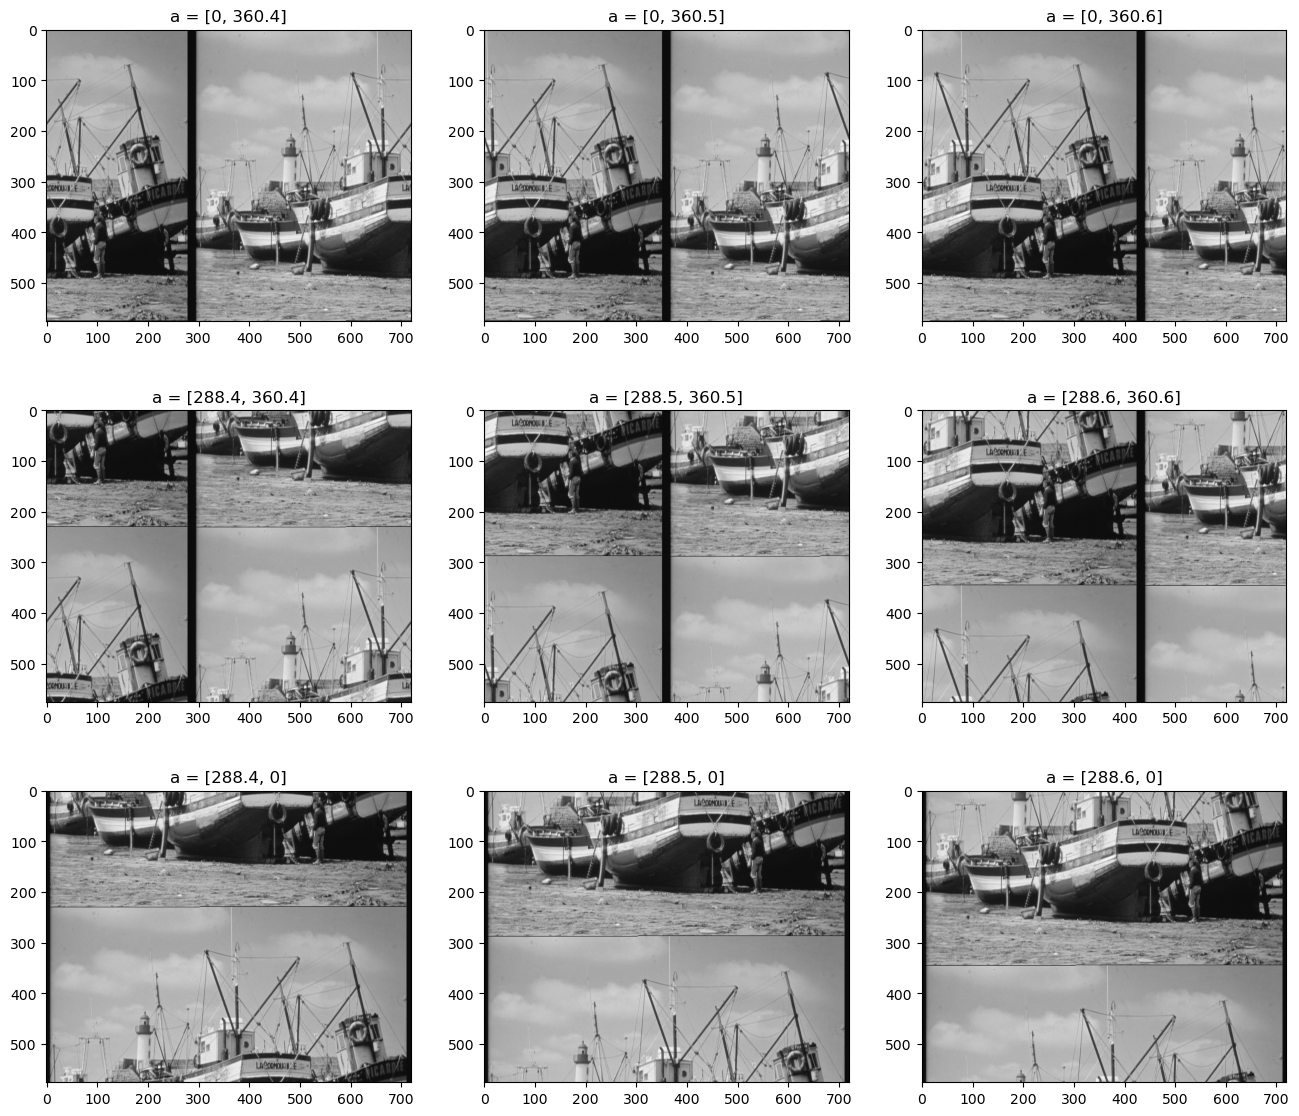

In [31]:
_, axes = plt.subplots(3, 3, figsize = (16, 14))

a_nent = [[0, 360.4], [0, 360.5], [0, 360.6], [288.4, 360.4], [288.5, 360.5], [288.6, 360.6], [288.4, 0], [288.5, 0], [288.6, 0]] 

for i, a in enumerate(a_nent[:3]):
    axes[0, i].imshow(translation2(u, a), cmap='gray')
    axes[0, i].set_title(f'a = {a}')

for j, a in enumerate(a_nent[3:6]):
    axes[1, j].imshow(translation2(u, a), cmap='gray')
    axes[1, j].set_title(f'a = {a}')
    
for k, a in enumerate(a_nent[6:]):
    axes[2, k].imshow(translation2(u, a), cmap='gray')
    axes[2, k].set_title(f'a = {a}')

### **Estimation de translation à une translation sous-pixelique**

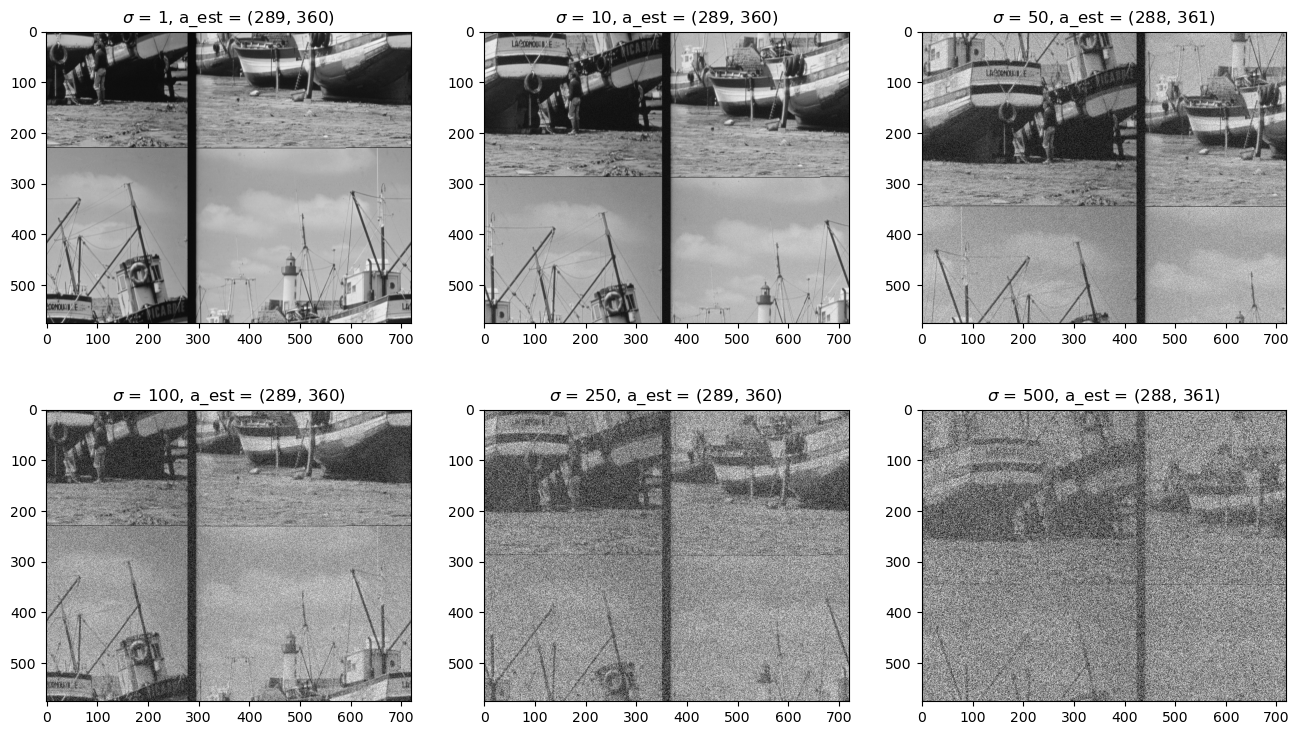

In [33]:
an_values = [[288.4, 360.4], [288.5, 360.5], [288.6, 360.6]]

sigma_values = [1, 10, 50, 100, 250, 500]

fig, axes = plt.subplots(2, 3, figsize=(16, 9))

for i, (sigma, an) in enumerate (zip(sigma_values[:3], an_values)):
    e = np.random.rand(*u.shape)*sigma
    v = translation2(u, an) + e
    axes[0, i].imshow(v, cmap = 'gray')
    axes[0, i].set_title(f"$\sigma$ = {sigma}, a_est = {a_estim(an, u, sigma)}")
    
for j, (sigma2, an) in enumerate (zip(sigma_values[3:], an_values)):
    e = np.random.rand(*u.shape)*sigma2
    v = translation2(u, an) + e
    axes[1, j].imshow(v, cmap = 'gray')
    axes[1, j].set_title(f"$\sigma$ = {sigma2}, a_est = {a_estim(an, u, sigma2)}")

### **Convexité de la fonction F(a)**

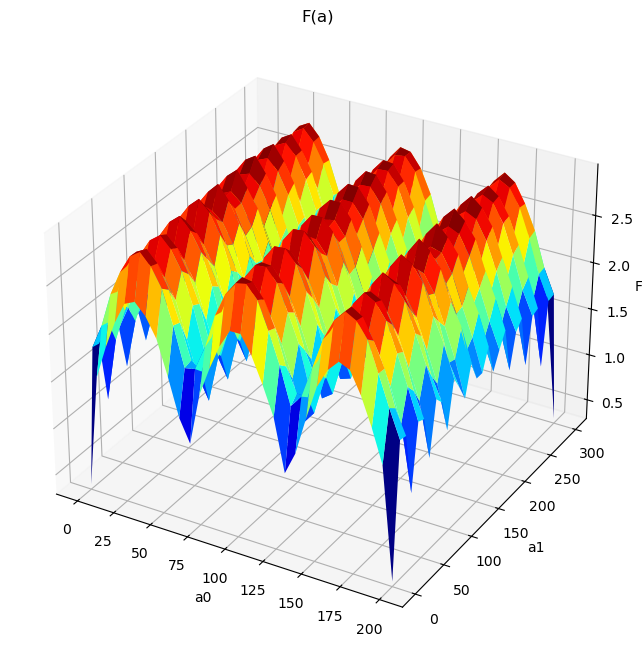

In [35]:
sigma = 50

v = translation2(u, [0,1]) + np.random.rand(*u.shape)*sigma

def F(a, u, v):
    return np.sum(np.abs(translation2(u, a) - v) ** 2)

# Grille de points dans le domaine de a
a0 = np.linspace(0, 200, 30)
a1 = np.linspace(0, 300, 30)
A0, A1 = np.meshgrid(a0, a1)
A = np.stack((A0, A1), axis=-1)

# Fonction a
F_val = np.zeros_like(A0)
for i in range(len(a0)):
    for j in range(len(a1)):
        F_val[i, j] = F(np.array([A0[i, j], A1[i, j]]), u, v)

# Affichage graphique en 3D
fig = plt.figure(figsize=(10, 8))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(A0, A1, F_val, cmap='jet')
ax.set_xlabel('a0')
ax.set_ylabel('a1')
ax.set_zlabel('F(a)')
ax.set_title('F(a)')
plt.savefig('F(a).png', bbox_inches='tight', pad_inches=0.4)
plt.show()

### **Implémentation de l'algorithme du gradient à pas constant**

In [37]:
def grad_F(u, v, a):
    ''' Gradient de F(a) '''
    M, N = u.shape
    
    # Calcul des transformées de Fouriers
    F_tau_u = fft2(translation2(u, a))
    Fv = fft2(v)
    
    # Calcul des termes correspondant aux dérivées partielles de e^{-2i\pi <a, m>} par rapport à a_0 et a_1
    term1_lig = np.multiply(-(2j*np.pi*np.arange(M))/M, F_tau_u.T).T
    term1_col = np.multiply(-(2j*np.pi*np.arange(N))/N, F_tau_u)
    
    # Calcul la conjugaison complexe
    term2 = np.conjugate(F_tau_u - Fv)
    
    # Calcul des parties réelles des produits et somme pour obtenir les composantes du gradient
    term_fin_lig = np.sum(2 * np.real(np.multiply(term1_lig, term2)))
    term_fin_col = np.sum(2 * np.real(np.multiply(term1_col, term2)))
    
    return np.array([term_fin_lig, term_fin_col])

In [38]:
def algo_grad_cons(grad_func, a0, u, ro, sigma, num_itérations, seuil):
    
    dim = len(a0)
    a = np.zeros((num_itérations, dim))
    a[0] = a0
    v0 = translation2(u, a0) + np.random.rand(*u.shape)*sigma
    for k in range(num_itérations-1) :
        grad = grad_func(u, v0, a[k])
        a[k+1] = a[k] - ro*grad
        if np.linalg.norm(grad) < seuil: return a[:k+1,:], k
    return a, num_itérations

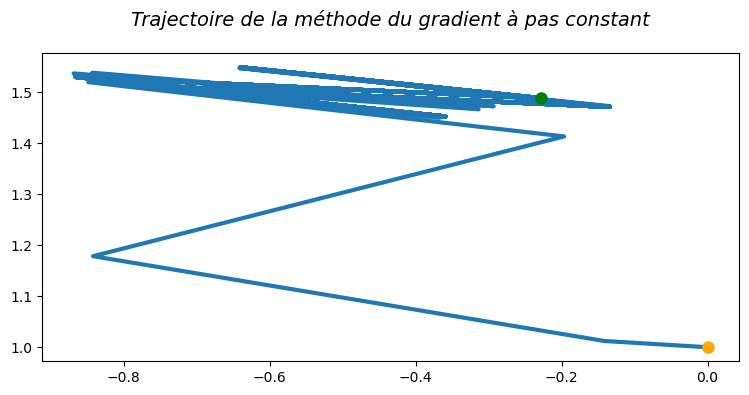

In [39]:
a, it = algo_grad_cons(grad_F, [0, 1], u, 1e-15, 1,  100, 1e-5)
plt.figure(figsize=(9,4), dpi=100)
plt.plot(a.T[0], a.T[1], linewidth = 3);
plt.plot(a.T[0][0], a.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
plt.plot(a.T[0][-1], a.T[1][-1], marker='o', markersize=8, color='green')  # Point final
plt.title("Trajectoire de la méthode du gradient à pas constant", pad= 20, fontsize=14, style='italic');

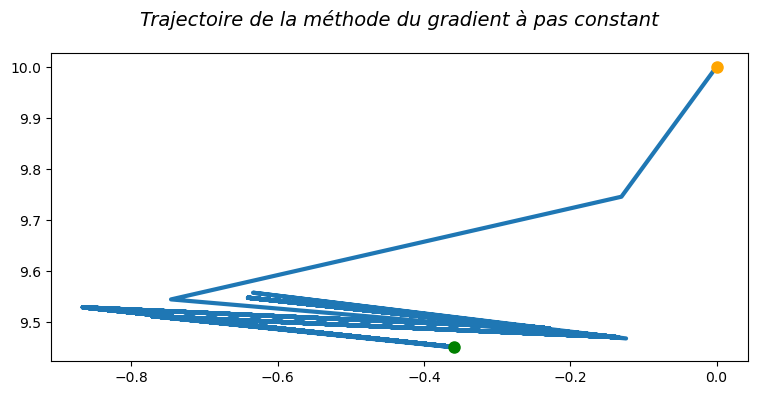

In [40]:
a, it = algo_grad_cons(grad_F, [0, 10], u, 1e-15, 1, 100, 1e-5)
plt.figure(figsize=(9,4), dpi=100)
plt.plot(a.T[0], a.T[1], linewidth = 3);
plt.plot(a.T[0][0], a.T[1][0], marker='o', markersize=8, color='orange')  # Point initial
plt.plot(a.T[0][-1], a.T[1][-1], marker='o', markersize=8, color='green')  # Point final
plt.title("Trajectoire de la méthode du gradient à pas constant", pad= 20, fontsize=14, style='italic');